In [14]:
''' Trying to implement Algorithm 2 of the paper '''

from qiskit import QuantumCircuit
import scipy.linalg as la
import numpy as np
from qiskit.primitives import Estimator
from qiskit.quantum_info import Operator, SparsePauliOp
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal

lam = 1.0
kap = 0.2

H = SparsePauliOp(['XXI','IXX','ZII','IZI','IIZ','XII','IXI','IIX'],
                          [-0.5*lam,-0.5*lam,-0.5,-0.5,-0.5,-0.5j*kap,-0.5j*kap,-0.5j*kap])

# H = SparsePauliOp(['XXII','IXXI','ZIII','IZII','IIZI','XIII','IXIX','IIXI'],
#                           [-0.5*lam,-0.5*lam,-0.5,-0.5,-0.5,-0.5j*kap,-0.5j*kap,-0.5j*kap])
  
def VQA_1st_Step(theta, Er):
    
  ## theta contains Ei as first element
  Ei = theta[0]
  qc = ansatz.assign_parameters(theta[1:])
  H_minusE = H + SparsePauliOp(['III'],[-Er - 1j*Ei])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def VQA_2nd_Step(theta):
    
  ## theta contains Er and Ei as 1st two elements
  Er = theta[0] ; Ei = theta[1] 
  qc = ansatz.assign_parameters(theta[2:])
  H_minusE = H + SparsePauliOp(['III'],[-Er - 1j*Ei])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def get_energy(Er0, Ei0):
    
    x0 = np.random.random( len(ansatz.parameters) + 1 )

    x0[0] = Ei0

    result1 = minimize(lambda theta: VQA_1st_Step(theta,Er0), x0 = x0, method="BFGS") 

    x1 = np.concatenate(([Er0], result1.x))

    result2 = minimize(VQA_2nd_Step, x0 = x1, method="BFGS") 

    return [ result2.x[0], result2.x[1] ]

ansatz = TwoLocal(H.num_qubits, ['ry', 'rz'], 'cz',reps=2)
get_energy(0.2,-1.5)

[np.float64(-0.0037196568237803803), np.float64(0.047088913462472286)]

In [15]:
import random
Er0 = -2.0
E_max = 2.0
delE = 0.1

Eset = []

while (Er0 < E_max):

    Ei0 = random.randint(1,5)
    print(Ei0)
    
    result0 = get_energy(Er0, Ei0)
    
    Er = result0[0]
    Ei = result0[1]
    
    print(Er + 1j*Ei)
    Eset.append(Er+1j*Ei)

    result1 = get_energy(Er0, -1.0*Ei0)

    Er = result1[0]
    Ei = result1[1]
    
    print(Er + 1j*Ei)
    Eset.append(Er+1j*Ei)

    Er0 += delE


3
(-1.5147394827066403+0.013026589671210485j)
(-1.5144634657569798-0.039961515572721935j)
2
(-1.5142843568508395-0.003175593673991132j)
(-1.514460281311397-0.04016704250639288j)
5
(-1.514410006457141-0.040145156571278935j)
(-1.5144085753356504-0.040148757567363524j)
3
(-1.514121527448911+0.004693563679427965j)
(-1.5144528856858808-0.040168922739535526j)
1
(-1.5143510584283129-0.040014501752072655j)
(-1.5144605607530173-0.04014933842539562j)
1
(-1.5144200413998277-0.03824114033568067j)
(-1.5144473322559797-0.040149623195352015j)
4
(-1.5144167678460834+0.04018646708801506j)
(-1.5128038825331607+0.04190650826368069j)
1
(-1.5143609871562704+0.008659944756268892j)
(-1.5147289808358855+0.014986865522583633j)
4
(-1.5134107283679423-0.013264688008220914j)
(-1.514444985789272+0.04017334058647724j)
2
(-1.51445370790003-0.0023193170359260104j)
(-1.5150092209975008-0.0037051645619869396j)
1
(-1.5143268765500746+0.0009801297609838713j)
(-1.5144084721944389-0.04030754166513797j)
4
(-1.51444098300150

In [16]:
Eset = list(set([elem.round(4) for elem in Eset]))
Erset = [elem.real for elem in Eset]
Eiset = [elem.imag for elem in Eset]

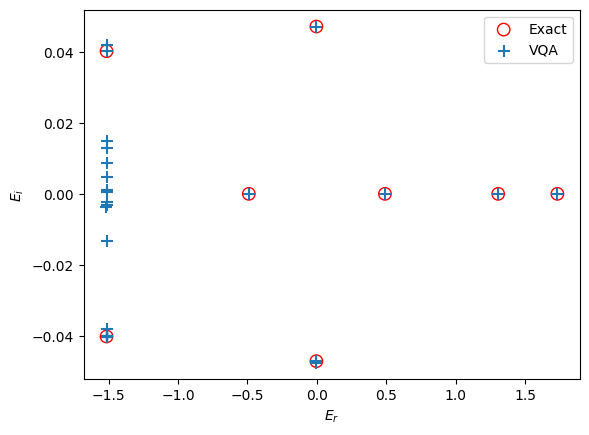

In [17]:
import matplotlib.pyplot as plt
main = la.eig(H)[0]
plt.xlabel('$E_r$')
plt.ylabel('$E_i$')
plt.scatter(main.real,main.imag,s= 80, facecolors = 'none', edgecolor = 'r',label = 'Exact')
plt.scatter(Erset,Eiset,s=70,marker = '+',label='VQA')
plt.legend()
plt.show()